In [3]:
import matplotlib 
matplotlib.use('Agg') 
% matplotlib inline
import matplotlib.pyplot as plt

D:\Users\greg_\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
def plot_logs(history):
    evaluation_cost = history.history['val_loss']
    evaluation_accuracy = history.history['val_acc']
    training_cost = history.history['loss']
    training_accuracy = history.history['acc']
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figwidth(10)
    ax1.plot(evaluation_cost,label= 'test')
    ax1.plot(training_cost, label='train')
    ax1.set_title('Cost')
    ax1.legend()
    ax2.plot(evaluation_accuracy, label='test')
    ax2.plot(training_accuracy, label='train')
    ax2.set_title('Accuracy')
    ax2.legend(loc='lower right')

In [5]:
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils


batch_size = 10
nb_classes = 10
nb_epoch = 30

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)[:50000,:]
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train[:50000], nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(30, input_shape=(784,)))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


50000 train samples
10000 test samples
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 30)            23550       dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 30)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            310         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 23,860
Trainable params: 23,860
Non-tr

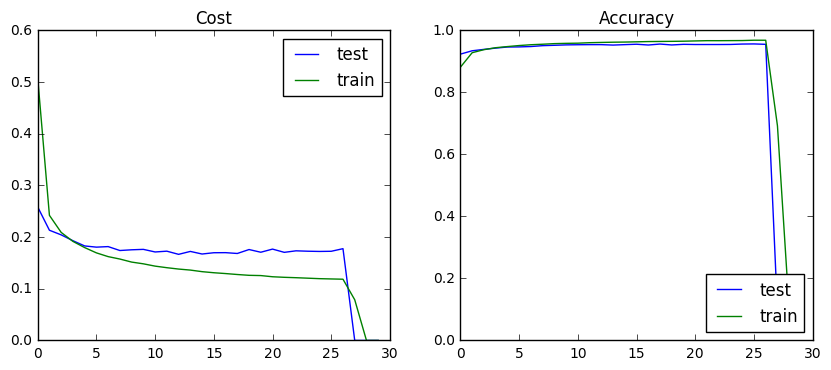

In [6]:
plot_logs(history)

In [5]:
## now with convolution layers

In [4]:
import numpy as np
from keras.datasets import mnist

from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

np.random.seed(1337)  # for reproducibility
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
26s - loss: 0.3472 - acc: 0.8999 - val_loss: 0.0676 - val_acc: 0.9786
Epoch 2/12
6s - loss: 0.1046 - acc: 0.9686 - val_loss: 0.0446 - val_acc: 0.9844
Epoch 3/12
6s - loss: 0.0785 - acc: 0.9774 - val_loss: 0.0409 - val_acc: 0.9868
Epoch 4/12
6s - loss: 0.0669 - acc: 0.9804 - val_loss: 0.0349 - val_acc: 0.9892
Epoch 5/12
6s - loss: 0.0590 - acc: 0.9829 - val_loss: 0.0330 - val_acc: 0.9891
Epoch 6/12
6s - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0338 - val_acc: 0.9894
Epoch 7/12
6s - loss: 0.0520 - acc: 0.9852 - val_loss: 0.0322 - val_acc: 0.9893
Epoch 8/12
6s - loss: 0.0492 - acc: 0.9854 - val_loss: 0.0300 - val_acc: 0.9899
Epoch 9/12
6s - loss: 0.0489 - acc: 0.9863 - val_loss: 0.0347 - val_acc: 0.9893
Epoch 10/12
6s - loss: 0.0489 - acc: 0.9860 - val_loss: 0.0336 - val_acc: 0.9887
Epoch 11/12
6s - loss: 0.0475 - acc: 0.9862 - val_loss: 0.02

In [5]:
import numpy as np
from keras.datasets import mnist

from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten

np.random.seed(1337)  # for reproducibility
batch_size = 128
nb_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)


model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=pool_size))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=2, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

('X_train shape:', (60000, 28, 28, 1))
(60000, 'train samples')
(10000, 'test samples')
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
6s - loss: 1.6979 - acc: 0.4691 - val_loss: 0.4488 - val_acc: 0.8796
Epoch 2/12
6s - loss: 0.6227 - acc: 0.8139 - val_loss: 0.2952 - val_acc: 0.9082
Epoch 3/12
6s - loss: 0.4693 - acc: 0.8591 - val_loss: 0.2224 - val_acc: 0.9343
Epoch 4/12
6s - loss: 0.4021 - acc: 0.8818 - val_loss: 0.1928 - val_acc: 0.9440
Epoch 5/12
6s - loss: 0.3636 - acc: 0.8925 - val_loss: 0.1728 - val_acc: 0.9489
Epoch 6/12
6s - loss: 0.3320 - acc: 0.9025 - val_loss: 0.1566 - val_acc: 0.9540
Epoch 7/12
6s - loss: 0.3103 - acc: 0.9082 - val_loss: 0.1513 - val_acc: 0.9538
Epoch 8/12
6s - loss: 0.2888 - acc: 0.9146 - val_loss: 0.1397 - val_acc: 0.9573
Epoch 9/12
6s - loss: 0.2713 - acc: 0.9195 - val_loss: 0.1360 - val_acc: 0.9574
Epoch 10/12
6s - loss: 0.2570 - acc: 0.9243 - val_loss: 0.1252 - val_acc: 0.9601
Epoch 11/12
6s - loss: 0.2443 - acc: 0.9290 - val_loss: 0.114

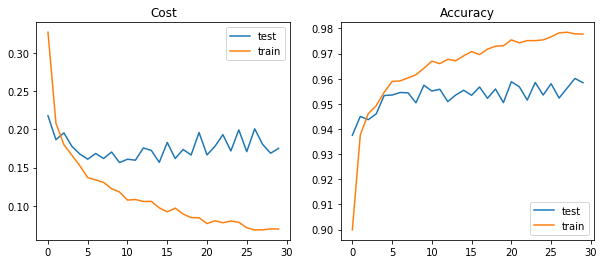

In [11]:
plot_logs(history)

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
15s - loss: 0.3544 - acc: 0.8875 - val_loss: 0.0566 - val_acc: 0.9812
Epoch 2/30
14s - loss: 0.0924 - acc: 0.9717 - val_loss: 0.0400 - val_acc: 0.9876
Epoch 3/30
14s - loss: 0.0683 - acc: 0.9797 - val_loss: 0.0313 - val_acc: 0.9899
Epoch 4/30
14s - loss: 0.0578 - acc: 0.9826 - val_loss: 0.0295 - val_acc: 0.9901
Epoch 5/30
14s - loss: 0.0481 - acc: 0.9854 - val_loss: 0.0245 - val_acc: 0.9910
Epoch 6/30
14s - loss: 0.0422 - acc: 0.9872 - val_loss: 0.0246 - val_acc: 0.9914
Epoch 7/30
14s - loss: 0.0395 - acc: 0.9876 - val_loss: 0.0226 - val_acc: 0.9932
Epoch 8/30
14s - loss: 0.0359 - acc: 0.9888 - val_loss: 0.0201 - val_acc: 0.9931
Epoch 9/30
14s - loss: 0.0328 - acc: 0.9899 - val_loss: 0.0259 - val_acc: 0.9916
Epoch 10/30
14s - loss: 0.0292 - acc: 0.9904 - val_loss: 0.0189 - val_acc: 0.9938
Epoch 11/30
14s - loss: 0.0275 - acc: 0.9916 - val_loss: 0.0185 - 

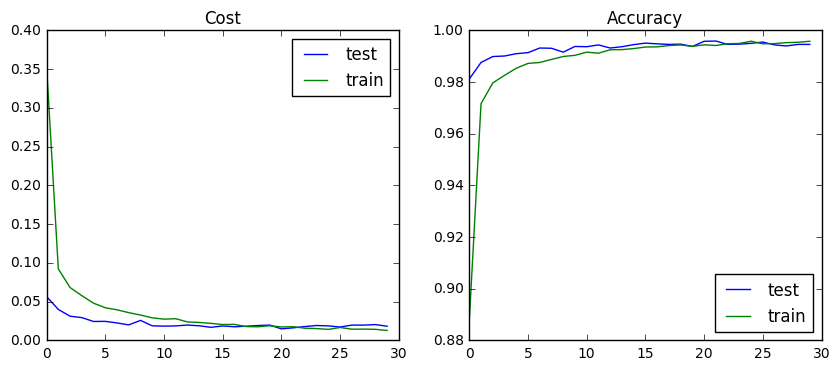

In [15]:
import numpy as np
from keras.datasets import mnist

from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam

np.random.seed(1337)  # for reproducibility
batch_size = 256
nb_classes = 10
nb_epoch = 30

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use                                  
nb_filters = 32     
nb_filters2 = 48
nb_filters3 = 64
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)                                                             
                                                                               
model_ = Sequential()                                                          
                                                                               
model_.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],           
                            border_mode='valid',                               
                                                    input_shape=input_shape))  
model_.add(Activation('relu'))                                                 
model_.add(Convolution2D(nb_filters2, kernel_size[0], kernel_size[1]))          
model_.add(Activation('relu'))                                                 
model_.add(MaxPooling2D(pool_size=pool_size))                                  
model_.add(Dropout(0.25))                                                      
model_.add(Convolution2D(nb_filters3, kernel_size[0], kernel_size[1]))          
model_.add(Activation('relu'))                                                 
model_.add(MaxPooling2D(pool_size=pool_size))                                  
model_.add(Dropout(0.25))                                                      
                                                                               
                                                                               
model_.add(Flatten())                                                          
model_.add(Dense(256))                                                         
model_.add(Activation('relu'))                                                 
model_.add(Dropout(0.5))                                                       
                                                                               
model_.add(Dense(128))                                                         
model_.add(Activation('relu'))                                                 
                                                                               
model_.add(Dense(nb_classes))                                                  
model_.add(Activation('softmax'))                                              
                                                                               
model_.compile(loss='categorical_crossentropy',                                
                      optimizer='Adam',                                   
                      metrics=['accuracy'])                      
                                                                               
history_ = model_.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,
                  verbose=2, validation_data=(X_test, Y_test))  

score = model_.evaluate(X_test, Y_test, verbose=2) 

print('Test score:', score[0])                                                 
print('Test accuracy:', score[1])                                              
plot_logs(history_)   